In [165]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_DFA import *
from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
from jove.Def_md2mc import *
from jove.JoveEditor import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Question 1, Part (a) : Develop a CFG and then a PDA that directly encodes this CFG for the language Labcd

 
## Labcd = { a^i b^j c^k d^l : if i=2 then j=k else l > k }

### NOTE it is d raised to "ell" not d raised to "one" (as l and 1  -- ELL and ONE -- often look similar)

## Type the PDA Design directly below

## But begin the PDA design with the CFG productions you developed

## Then, for each PDA transition, put the CFG rule it encodes as comments

## See additional details below

# You may begin your design with nonterminal names of > 1 character

## BUT finally, you need single-character non-terminals for Jove's CFG simulation using PDA

In [166]:

#----- MY FINAL PRODUCTION  RULES ARE HERE after I turned all non-terminals into 1-character non-terminals ------
'''

S -> aBCd | BCd | aaWU | aaaAS
A -> aA | ''
W -> bWc
U -> dU | ''
B -> bB | ''
C -> cCd | d | ''


'''
#----- MY PDA IS BELOW





Labcd = md2mc('''

PDA

I : '', # ; # -> S

S : a, '' ; a -> S
S : '', a ; '' -> X
X : '', a ; '' -> Y
Y : '', a ; '' -> B

S : b, '' ; '' -> B
S : c, '' ; c -> C
S : '', '' ; '' -> D

B : '', a ; '' -> B
B : b, '' ; '' -> B
B : c, '' ; c -> C
B : '', '' ; '' -> D

C : c, '' ; c -> C
C : d, c ; '' -> D

D : d, c ; '' -> D
D : d, # ; # -> D
D : d, # ; # -> F

!! 2 a's
Y : b, '' ; b -> W
Y : '', '' ; '' -> F
W : b, '' ; b -> W
W : c, b ; '' -> V

V : c, b ; '' -> V
V : '', # ; # -> F

V : d, '' ; '' -> U
U : d, '' ; '' -> U
U : '', '' ; '' -> F

!!--- be neat and careful as you have to avoid mistakes ---

!! PUT YOUR CFG PRODUCTION RULE OR RULES HERE
!! S -> aBCd | BCd | aaWU | aaaAS
!! PUT WHAT PDA TRANSITIONS IT GENERATED, BELOW
!! S : '', a ; '' -> X
!! X : '', a ; '' -> Y
!! Y : '', a ; '' -> B
!! S : b, '' ; '' -> B
!! S : c, '' ; c -> C
!! S : '', '' ; '' -> D
!! B : c, '' ; c -> C
!! B : '', '' ; '' -> D
!! Y : '', '' ; '' -> F

!! PUT YOUR CFG PRODUCTION RULE OR RULES HERE
!! A -> aA | ''
!! PUT WHAT PDA TRANSITIONS IT GENERATED, BELOW
!! B : '', a ; '' -> B

!! PUT YOUR CFG PRODUCTION RULE OR RULES HERE
!! W -> bWc
!! PUT WHAT PDA TRANSITIONS IT GENERATED, BELOW
!! Y : b, '' ; b -> W
!! W : b, '' ; b -> W
!! W : c, b ; '' -> V
!! V : c, b ; '' -> V
!! V : '', # ; # -> F

!! PUT YOUR CFG PRODUCTION RULE OR RULES HERE
!! U -> dU | ''
!! PUT WHAT PDA TRANSITIONS IT GENERATED, BELOW
!! V : d, '' ; '' -> U
!! U : d, '' ; '' -> U
!! U : '', '' ; '' -> F

!! PUT YOUR CFG PRODUCTION RULE OR RULES HERE
!! B -> bB | ''
!! PUT WHAT PDA TRANSITIONS IT GENERATED, BELOW
!! B : b, '' ; '' -> B

!! PUT YOUR CFG PRODUCTION RULE OR RULES HERE
!! C -> cCd | d | ''
!! PUT WHAT PDA TRANSITIONS IT GENERATED, BELOW
!! C : c, '' ; c -> C
!! C : d, c ; '' -> D
!! D : d, c ; '' -> D
!! D : d, # ; # -> D
!! D : d, # ; # -> F

 


''')


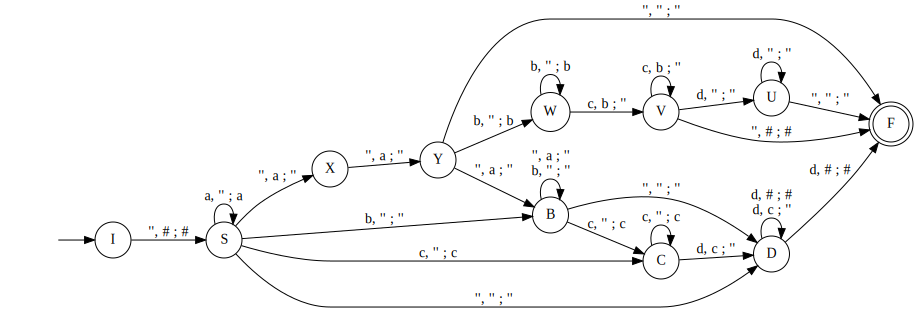

In [167]:
dotObj_pda(Labcd, FuseEdges=True)

# Question 1, Part (b) : 

In [168]:
explore_pda('d', Labcd)

String d accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'd', '#')
->  ('S', 'd', '#')
->  ('D', 'd', '#')
->  ('F', '', '#') .


In [169]:
explore_pda('dd', Labcd)

String dd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'dd', '#')
->  ('S', 'dd', '#')
->  ('D', 'dd', '#')
->  ('D', 'd', '#')
->  ('F', '', '#') .


In [170]:
explore_pda('cdd', Labcd)

String cdd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'cdd', '#')
->  ('S', 'cdd', '#')
->  ('C', 'dd', 'c#')
->  ('D', 'd', '#')
->  ('F', '', '#') .


In [171]:
explore_pda('ccdd', Labcd)

String ccdd rejected by your PDA :-(
Visited states are:
{('C', 'cdd', 'c#'), ('S', 'ccdd', '#'), ('D', '', '#'), ('I', 'ccdd', '#'), ('D', 'd', 'c#'), ('C', 'dd', 'cc#'), ('D', 'ccdd', '#')}


In [172]:
explore_pda('ccd', Labcd)

String ccd rejected by your PDA :-(
Visited states are:
{('D', '', 'c#'), ('C', 'cd', 'c#'), ('I', 'ccd', '#'), ('D', 'ccd', '#'), ('C', 'd', 'cc#'), ('S', 'ccd', '#')}


In [173]:
explore_pda('acd', Labcd)

String acd rejected by your PDA :-(
Visited states are:
{('S', 'acd', '#'), ('D', 'cd', 'a#'), ('X', 'cd', '#'), ('D', 'acd', '#'), ('D', '', 'a#'), ('C', 'd', 'ca#'), ('I', 'acd', '#'), ('S', 'cd', 'a#')}


In [174]:
explore_pda('aacd', Labcd)

String aacd rejected by your PDA :-(
Visited states are:
{('D', 'cd', 'aa#'), ('S', 'aacd', '#'), ('S', 'cd', 'aa#'), ('D', '', 'aa#'), ('X', 'cd', 'a#'), ('D', 'acd', 'a#'), ('F', 'cd', '#'), ('S', 'acd', 'a#'), ('D', 'aacd', '#'), ('X', 'acd', '#'), ('C', 'd', 'caa#'), ('Y', 'cd', '#'), ('I', 'aacd', '#')}


In [175]:
explore_pda('aaad', Labcd)

String aaad accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaad', '#')
->  ('S', 'aaad', '#')
->  ('S', 'aad', 'a#')
->  ('S', 'ad', 'aa#')
->  ('S', 'd', 'aaa#')
->  ('X', 'd', 'aa#')
->  ('Y', 'd', 'a#')
->  ('B', 'd', '#')
->  ('D', 'd', '#')
->  ('F', '', '#') .


In [176]:
explore_pda('aaaccdd', Labcd)

String aaaccdd rejected by your PDA :-(
Visited states are:
{('C', 'cdd', 'c#'), ('D', 'accdd', 'aa#'), ('F', 'ccdd', 'a#'), ('S', 'aaaccdd', '#'), ('S', 'aaccdd', 'a#'), ('C', 'dd', 'ccaaa#'), ('D', 'ccdd', 'aaa#'), ('D', 'd', 'c#'), ('B', 'ccdd', '#'), ('S', 'ccdd', 'aaa#'), ('X', 'accdd', 'a#'), ('D', 'd', 'caaa#'), ('D', 'aaaccdd', '#'), ('S', 'accdd', 'aa#'), ('D', 'aaccdd', 'a#'), ('I', 'aaaccdd', '#'), ('F', 'accdd', '#'), ('D', '', '#'), ('D', '', 'aaa#'), ('D', 'ccdd', '#'), ('C', 'cdd', 'caaa#'), ('Y', 'ccdd', 'a#'), ('X', 'ccdd', 'aa#'), ('Y', 'accdd', '#'), ('C', 'dd', 'cc#'), ('X', 'aaccdd', '#')}


In [177]:
explore_pda('aaaccddd', Labcd)

String aaaccddd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaccddd', '#')
->  ('S', 'aaaccddd', '#')
->  ('S', 'aaccddd', 'a#')
->  ('S', 'accddd', 'aa#')
->  ('S', 'ccddd', 'aaa#')
->  ('X', 'ccddd', 'aa#')
->  ('Y', 'ccddd', 'a#')
->  ('B', 'ccddd', '#')
->  ('C', 'cddd', 'c#')
->  ('C', 'ddd', 'cc#')
->  ('D', 'dd', 'c#')
->  ('D', 'd', '#')
->  ('F', '', '#') .


In [178]:
explore_pda('aa', Labcd)

String aa accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aa', '#')
->  ('S', 'aa', '#')
->  ('S', 'a', 'a#')
->  ('S', '', 'aa#')
->  ('X', '', 'a#')
->  ('Y', '', '#')
->  ('F', '', '#') .


In [179]:
explore_pda('aab', Labcd)

String aab rejected by your PDA :-(
Visited states are:
{('D', 'b', 'aa#'), ('B', '', '#'), ('S', 'b', 'aa#'), ('I', 'aab', '#'), ('D', '', 'aa#'), ('D', '', 'a#'), ('D', 'aab', '#'), ('X', 'ab', '#'), ('D', '', '#'), ('S', 'ab', 'a#'), ('W', '', 'b#'), ('F', 'b', '#'), ('B', '', 'aa#'), ('S', 'aab', '#'), ('Y', 'b', '#'), ('B', '', 'a#'), ('X', 'b', 'a#'), ('D', 'ab', 'a#')}


In [180]:
explore_pda('aabc', Labcd)

String aabc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aabc', '#')
->  ('S', 'aabc', '#')
->  ('S', 'abc', 'a#')
->  ('S', 'bc', 'aa#')
->  ('X', 'bc', 'a#')
->  ('Y', 'bc', '#')
->  ('W', 'c', 'b#')
->  ('V', '', '#')
->  ('F', '', '#') .


In [181]:
explore_pda('aabbccd', Labcd)

String aabbccd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aabbccd', '#')
->  ('S', 'aabbccd', '#')
->  ('S', 'abbccd', 'a#')
->  ('S', 'bbccd', 'aa#')
->  ('X', 'bbccd', 'a#')
->  ('Y', 'bbccd', '#')
->  ('W', 'bccd', 'b#')
->  ('W', 'ccd', 'bb#')
->  ('V', 'cd', 'b#')
->  ('V', 'd', '#')
->  ('U', '', '#')
->  ('F', '', '#') .


In [182]:
explore_pda('aabcddddd', Labcd)

String aabcddddd accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aabcddddd', '#')
->  ('S', 'aabcddddd', '#')
->  ('S', 'abcddddd', 'a#')
->  ('S', 'bcddddd', 'aa#')
->  ('B', 'cddddd', 'aa#')
->  ('B', 'cddddd', 'a#')
->  ('B', 'cddddd', '#')
->  ('C', 'ddddd', 'c#')
->  ('D', 'dddd', '#')
->  ('D', 'ddd', '#')
->  ('D', 'dd', '#')
->  ('D', 'd', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aabcddddd', '#')
->  ('S', 'aabcddddd', '#')
->  ('S', 'abcddddd', 'a#')
->  ('S', 'bcddddd', 'aa#')
->  ('X', 'bcddddd', 'a#')
->  ('Y', 'bcddddd', '#')
->  ('W', 'cddddd', 'b#')
->  ('V', 'ddddd', '#')
->  ('U', 'dddd', '#')
->  ('U', 'ddd', '#')
->  ('U', 'dd', '#')
->  ('U', 'd', '#')
->  ('U', '', '#')
->  ('F', '', '#') .


In [183]:
explore_pda('aabcc', Labcd)

String aabcc rejected by your PDA :-(
Visited states are:
{('V', 'c', '#'), ('S', 'abcc', 'a#'), ('B', 'cc', 'aa#'), ('X', 'abcc', '#'), ('B', 'cc', 'a#'), ('D', 'cc', '#'), ('W', 'cc', 'b#'), ('C', 'c', 'c#'), ('S', 'aabcc', '#'), ('C', '', 'ccaa#'), ('C', '', 'cc#'), ('X', 'bcc', 'a#'), ('F', 'c', '#'), ('D', 'cc', 'aa#'), ('S', 'bcc', 'aa#'), ('C', 'c', 'ca#'), ('D', 'cc', 'a#'), ('B', 'cc', '#'), ('Y', 'bcc', '#'), ('C', '', 'cca#'), ('D', 'aabcc', '#'), ('C', 'c', 'caa#'), ('D', 'bcc', 'aa#'), ('F', 'bcc', '#'), ('D', 'abcc', 'a#'), ('I', 'aabcc', '#')}


In [184]:
explore_pda('aaaaaaaaaabcdd', Labcd)

String aaaaaaaaaabcdd accepted by your PDA in 10 ways :-) 
Here are the ways: 
Final state  ('F', '', 'aaaaaaaa#')
Reached as follows:
->  ('I', 'aaaaaaaaaabcdd', '#')
->  ('S', 'aaaaaaaaaabcdd', '#')
->  ('S', 'aaaaaaaaabcdd', 'a#')
->  ('S', 'aaaaaaaabcdd', 'aa#')
->  ('S', 'aaaaaaabcdd', 'aaa#')
->  ('S', 'aaaaaabcdd', 'aaaa#')
->  ('S', 'aaaaabcdd', 'aaaaa#')
->  ('S', 'aaaabcdd', 'aaaaaa#')
->  ('S', 'aaabcdd', 'aaaaaaa#')
->  ('S', 'aabcdd', 'aaaaaaaa#')
->  ('S', 'abcdd', 'aaaaaaaaa#')
->  ('S', 'bcdd', 'aaaaaaaaaa#')
->  ('X', 'bcdd', 'aaaaaaaaa#')
->  ('Y', 'bcdd', 'aaaaaaaa#')
->  ('W', 'cdd', 'baaaaaaaa#')
->  ('V', 'dd', 'aaaaaaaa#')
->  ('U', 'd', 'aaaaaaaa#')
->  ('U', '', 'aaaaaaaa#')
->  ('F', '', 'aaaaaaaa#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaaaaaaaabcdd', '#')
->  ('S', 'aaaaaaaaaabcdd', '#')
->  ('S', 'aaaaaaaaabcdd', 'a#')
->  ('S', 'aaaaaaaabcdd', 'aa#')
->  ('S', 'aaaaaaabcdd', 'aaa#')
->  ('S', 'aaaaaabcdd', 'aaaa#')
->  ('S', 'aaaaa

# Questions 2 and 3: Now do the PL proofs of MT2
## Check Canvas for the actual question wording. 
## You have to answer this on Canvas.

Question 2:

Assume that Labcd is regular

